<a href="https://colab.research.google.com/github/swastikbanerjee/ML_Lab/blob/main/2348566_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Python Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import threading
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore",category=FutureWarning)
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

Importing Dataset

In [18]:
df = pd.read_csv("/content/Groceries_dataset.csv")

Data Analysis

In [19]:
df.shape

(38765, 3)

In [20]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [21]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

Adding a column and making a binary matrix

In [22]:
df['Quantity'] = 1
transactions =  df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
def encode(x):
  if x >= 0:
    return 1
  else:
    return 0
basket = transactions.applymap(encode)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Thread creation for Apriori & FP-Growth

In [23]:
aprioricompleted = threading.Event()
fpcompleted = threading.Event()

In [24]:
executiontime = [0,0]

Apriori Function

In [25]:
def runapriori():
    stime = time.time()
    global aprioriresults
    aprioriresults = apriori(basket, min_support=0.02, use_colnames=True)
    executiontime[0] = time.time() - stime
    aprioricompleted.set()

FP-Growth Function

In [26]:
def runfp():
    stime = time.time()
    global fpresults
    fpresults = fpgrowth(basket, min_support=0.02, use_colnames=True)
    executiontime[1] = time.time() - stime
    fpcompleted.set()

In [27]:
apthread = threading.Thread(target=runapriori)
fpthread = threading.Thread(target=runfp)

Both threads after finishing running concurrently, are joined by the main thread and the running time values are stored in the executiontime list

In [28]:
apthread.start()
fpthread.start()
aprioricompleted.wait()
fpcompleted.wait()
apthread.join()
fpthread.join()

In [29]:
print(executiontime)

[0.5882489681243896, 0.548712968826294]


Execution time for both the algorithms are visualized. FP-Growth Algorithm takes lesser time than Apriori.

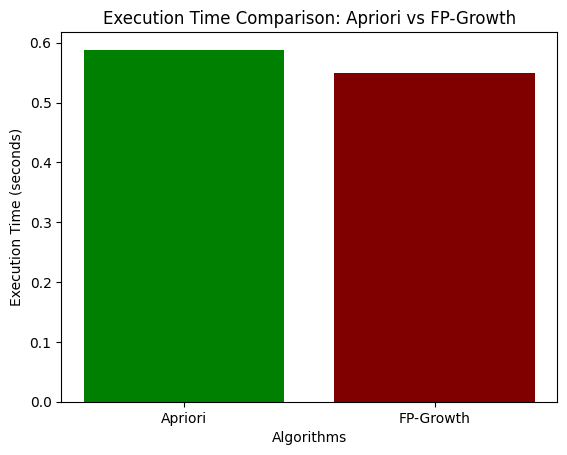

In [30]:
plt.bar(['Apriori', 'FP-Growth'], executiontime, color=['green','maroon'])
plt.xlabel('Algorithms')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison: Apriori vs FP-Growth');

Minimum Support and Confidence Values fetched from the user and they are printed along with their confidence values for both the algorithms.

In [34]:
mins = float(input("Enter the minimum support threshold: "))
minc = float(input("Enter the minimum confidence threshold: "))
ap = apriori(basket, min_support=mins, use_colnames=True)
print('The results with Apriori is')
print(association_rules(ap, metric='confidence', min_threshold=minc))
fp = fpgrowth(basket, min_support=mins, use_colnames=True)
print('The results with FP-Growth is')
print(association_rules(fp, metric='confidence', min_threshold=minc))

Enter the minimum support threshold: 0.1
Enter the minimum confidence threshold: 0.1
The results with Apriori is
           antecedents         consequents  antecedent support  \
0         (whole milk)     (bottled water)            0.458184   
1      (bottled water)        (whole milk)            0.213699   
2   (other vegetables)        (rolls/buns)            0.376603   
3         (rolls/buns)  (other vegetables)            0.349666   
4   (other vegetables)              (soda)            0.376603   
5               (soda)  (other vegetables)            0.313494   
6         (whole milk)  (other vegetables)            0.458184   
7   (other vegetables)        (whole milk)            0.376603   
8   (other vegetables)            (yogurt)            0.376603   
9             (yogurt)  (other vegetables)            0.282966   
10        (rolls/buns)              (soda)            0.349666   
11              (soda)        (rolls/buns)            0.313494   
12        (whole milk)       